### Apophis path

In [1]:
import matplotlib.pyplot as plt
from astropy.time import Time
import ciboulette.base.ciboulette as Cbl

- Create objects ciboulette class

In [2]:
cbl = Cbl.Ciboulette()

- Create instuments and table visulisation

In [8]:
cbl.sigma120_400 = 200
cbl.atik383L
cbl.table['INSTRUME','FOCAL','FILTER','NAME','OBSERVER','RA','DEC','OBJECT'].pprint(max_width = 255)

 INSTRUME  FOCAL FILTER     NAME     OBSERVER         RA                DEC         OBJECT
---------- ----- ------ ------------ -------- ----------------- ------------------- ------
Atik 383L+   200      L CIBOULETTE-A     CAM1 8.905569027777776 -1.1210191666666667   INIT


- Create Miriade table for map with Miriade Ephemeris Generator 'http://vo.imcce.fr/webservices/miriade/?ephemcc' 

In [9]:
epoch = Time('2021-03-13 22:00:00', format='iso')
data_eph,WCS_eph,title_eph = cbl.miriademap('apophis',epoch,'1h',10)

- Coordinate configuration for ciboulette object

In [10]:
RA = data_eph['RA'][5]/15
DEC = data_eph['DEC'][5]
cbl.coordinates = { "RA": RA, "DEC": DEC }
cbl.table['RA','DEC'].pprint(max_width = 255)

        RA                DEC        
----------------- -------------------
8.905569027777776 -1.1210191666666667


- Create ciboulette table for map with astroquery

In [11]:
data,WCS,title = cbl.starmap

- Displays the map

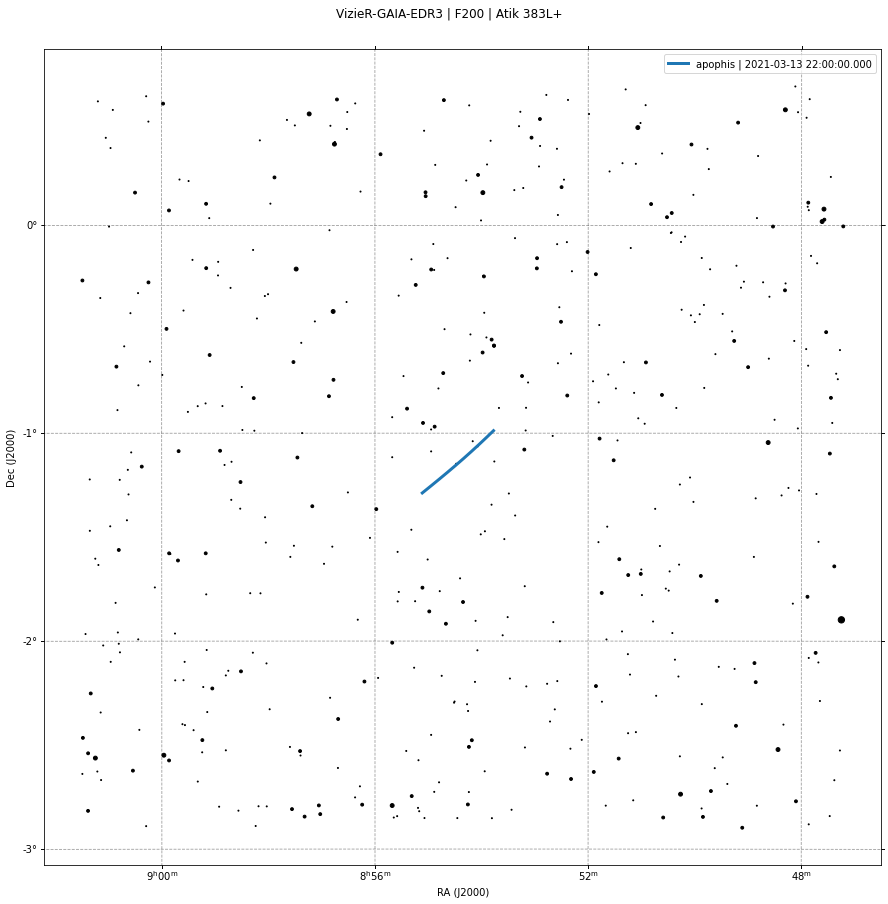

In [12]:
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111, projection=WCS)
ax.grid(b = True, linestyle = '--', color = 'black', alpha = 0.40)
ax.scatter(data['RA'], data['DEC'], transform=ax.get_transform('icrs'), s=data['MARKER'],edgecolor='black', facecolor='black')
#ax.scatter(data_epc['RA'], data_epc['DEC'], transform=ax.get_transform('icrs'), s=data_epc['MARKER'],edgecolor='blue', facecolor='blue',)
ax.plot(data_eph['RA'], data_eph['DEC'], transform=ax.get_transform('icrs'), lw=3, label = title_eph)
ax.legend()
fig.suptitle(title, y = 0.92, fontsize = 12)
plt.xlabel('RA (J2000)')
plt.ylabel('Dec (J2000)')
# Display
plt.show()